In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import model_selection

from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.utils import resample

In [2]:
df=pd.read_csv('/Users/nicole/Desktop/aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.drop(columns=['enrollee_id','city','major_discipline','experience','gender','company_type','company_size'],inplace=True)

In [5]:
for i in ['enrolled_university','education_level','last_new_job','relevent_experience']:
    df[i] = df[i].fillna(df[i].mode()[0])

In [6]:
df = pd.get_dummies(df,drop_first=True)

In [7]:
df.head()

,city_development_index,training_hours,target,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,36,1.0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.776,47,0.0,1,0,1,0,0,0,0,0,0,0,1,0
2,0.624,83,0.0,1,0,0,0,0,0,0,0,0,0,0,1
3,0.789,52,1.0,1,0,1,0,0,0,0,0,0,0,0,1
4,0.767,8,0.0,0,0,1,0,1,0,0,0,0,1,0,0


In [8]:
X = df.drop(columns = 'target').values
y = df.loc[:,'target'].values

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.82      3584
         1.0       0.43      0.35      0.39      1206

    accuracy                           0.72      4790
   macro avg       0.61      0.60      0.60      4790
weighted avg       0.70      0.72      0.71      4790

[[3018  566]
 [ 781  425]]
Feature: 0, Score: 0.34317
Feature: 1, Score: 0.53940
Feature: 2, Score: 0.02197
Feature: 3, Score: 0.00729
Feature: 4, Score: 0.01993
Feature: 5, Score: 0.01134
Feature: 6, Score: 0.01084
Feature: 7, Score: 0.00352
Feature: 8, Score: 0.00438
Feature: 9, Score: 0.00912
Feature: 10, Score: 0.00644
Feature: 11, Score: 0.00611
Feature: 12, Score: 0.00723
Feature: 13, Score: 0.00926


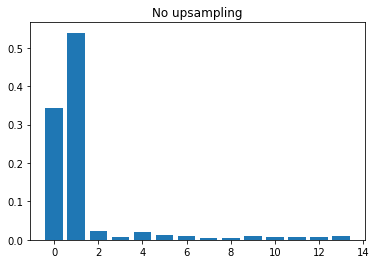

In [12]:
model = RandomForestClassifier(criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
importance = model.feature_importances_
# summarize feat
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("No upsampling")
plt.show()

## SMOTE

In [13]:
smote = SMOTE(random_state=42)
Xs_train,ys_train = smote.fit_resample(X_train,y_train)

print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(ys_train))

Original dataset shape Counter({0.0: 10797, 1.0: 3571})
Resampled dataset shape Counter({0.0: 10797, 1.0: 10797})


In [14]:
Counter(Xs_train[:,6])

Counter({0.0: 16640,
         1.0: 4142,
         0.05553631211796206: 1,
         0.21806742021179115: 1,
         0.30255217183569394: 1,
         0.5024706839725472: 1,
         0.40874376280852787: 1,
         0.9583559776600197: 1,
         0.4768419991940174: 1,
         0.3182751495876579: 1,
         0.20779046470475382: 1,
         0.5847385624271795: 1,
         0.5177086760037899: 1,
         0.20151575706957459: 1,
         0.7726779289299726: 1,
         0.660762659471133: 1,
         0.29464362980588177: 1,
         0.7563614306544171: 1,
         0.5258979241577331: 1,
         0.8571540924080763: 1,
         0.03710836582196242: 1,
         0.4798845854976055: 1,
         0.9501354235058211: 1,
         0.2216607709324413: 1,
         0.6670433856285818: 1,
         0.5354133355114677: 1,
         0.04208792428435171: 1,
         0.6768057501426226: 1,
         0.6097120913368635: 1,
         0.5680814688541712: 1,
         0.5081688063439632: 1,
         0.715086747447

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      3584
         1.0       0.40      0.40      0.40      1206

    accuracy                           0.70      4790
   macro avg       0.60      0.60      0.60      4790
weighted avg       0.70      0.70      0.70      4790

[[2880  704]
 [ 727  479]]
Feature: 0, Score: 0.34279
Feature: 1, Score: 0.35105
Feature: 2, Score: 0.05004
Feature: 3, Score: 0.01554
Feature: 4, Score: 0.04374
Feature: 5, Score: 0.03145
Feature: 6, Score: 0.03688
Feature: 7, Score: 0.00824
Feature: 8, Score: 0.00799
Feature: 9, Score: 0.02719
Feature: 10, Score: 0.01512
Feature: 11, Score: 0.01849
Feature: 12, Score: 0.02921
Feature: 13, Score: 0.02228


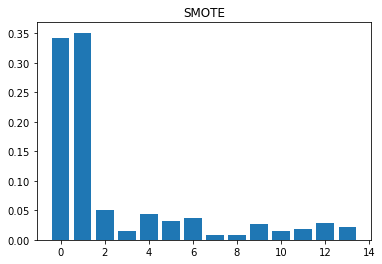

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model = RandomForestClassifier(criterion='gini')
model.fit(Xs_train, ys_train)
y_pred = model.predict(X_test)
importance = model.feature_importances_
# summarize feat
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("SMOTE")
plt.show()

In [16]:
X_train.shape

(14368, 14)

## SMOTENC

In [17]:
smote = SMOTENC(random_state=42,categorical_features=[2,3,4,5,6,7,8,9,10,11,12,13])
Xsnc_train,ysnc_train = smote.fit_resample(X_train,y_train)

print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(ysnc_train))

Original dataset shape Counter({0.0: 10797, 1.0: 3571})
Resampled dataset shape Counter({0.0: 10797, 1.0: 10797})


In [18]:
Counter(Xsnc_train[:,6])

Counter({0.0: 16883, 1.0: 4711})

              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77      3584
         1.0       0.37      0.44      0.40      1206

    accuracy                           0.67      4790
   macro avg       0.58      0.59      0.59      4790
weighted avg       0.69      0.67      0.68      4790

[[2681  903]
 [ 678  528]]
Feature: 0, Score: 0.43754
Feature: 1, Score: 0.44120
Feature: 2, Score: 0.02298
Feature: 3, Score: 0.00707
Feature: 4, Score: 0.01902
Feature: 5, Score: 0.01374
Feature: 6, Score: 0.01059
Feature: 7, Score: 0.00501
Feature: 8, Score: 0.00631
Feature: 9, Score: 0.00805
Feature: 10, Score: 0.00537
Feature: 11, Score: 0.00519
Feature: 12, Score: 0.00832
Feature: 13, Score: 0.00960


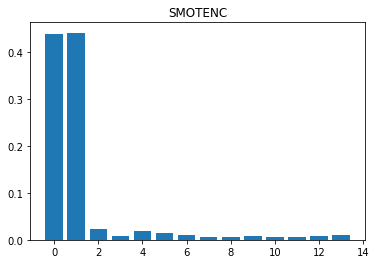

In [19]:
model = RandomForestClassifier(criterion='gini')
model.fit(Xsnc_train, ysnc_train)
y_pred = model.predict(X_test)
importance = model.feature_importances_
# summarize feat
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("SMOTENC")
plt.show()

## SMOTEENN

In [315]:
smote = SMOTEENN(random_state=42)
Xsn_train,ysn_train = smote.fit_resample(X_train,y_train)

print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(ysn_train))

Original dataset shape Counter({0.0: 10797, 1.0: 3571})
Resampled dataset shape Counter({1.0: 5081, 0.0: 5057})


In [316]:
Counter(Xsn_train[:,6])

Counter({1.0: 2154,
         0.0: 7539,
         0.30255217183569394: 1,
         0.40874376280852787: 1,
         0.9583559776600197: 1,
         0.4768419991940174: 1,
         0.3182751495876579: 1,
         0.5177086760037899: 1,
         0.7726779289299726: 1,
         0.660762659471133: 1,
         0.29464362980588177: 1,
         0.5258979241577331: 1,
         0.03710836582196242: 1,
         0.4798845854976055: 1,
         0.9501354235058211: 1,
         0.6768057501426226: 1,
         0.5680814688541712: 1,
         0.7150867474475642: 1,
         0.9248770898454908: 1,
         0.4643399382718879: 1,
         0.4815891402193626: 1,
         0.23715209765352097: 1,
         0.2740831956409957: 1,
         0.9417824879246603: 1,
         0.6204006435516677: 1,
         0.9011266573373486: 1,
         0.6172708086822287: 1,
         0.5929827009674321: 1,
         0.5318580581292642: 1,
         0.9689678620822997: 1,
         0.8876139506777393: 1,
         0.07563036383454946

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80      3584
         1.0       0.42      0.50      0.46      1206

    accuracy                           0.70      4790
   macro avg       0.62      0.63      0.63      4790
weighted avg       0.72      0.70      0.71      4790

[[2767  817]
 [ 606  600]]
Feature: 0, Score: 0.37401
Feature: 1, Score: 0.22235
Feature: 2, Score: 0.09542
Feature: 3, Score: 0.01341
Feature: 4, Score: 0.08518
Feature: 5, Score: 0.03426
Feature: 6, Score: 0.03751
Feature: 7, Score: 0.00880
Feature: 8, Score: 0.00864
Feature: 9, Score: 0.02534
Feature: 10, Score: 0.01519
Feature: 11, Score: 0.01960
Feature: 12, Score: 0.03503
Feature: 13, Score: 0.02527


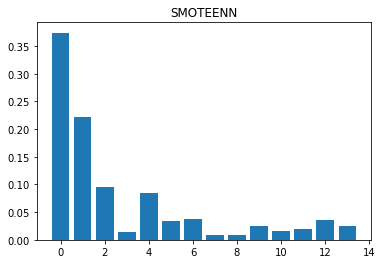

In [317]:
model = RandomForestClassifier(criterion='gini')
model.fit(Xsn_train, ysn_train)
y_pred = model.predict(X_test)
importance = model.feature_importances_
# summarize feat
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("SMOTEENN")
plt.show()

# Resample

In [318]:
train, test = train_test_split(df, test_size=0.25,random_state=42)

In [319]:
data_majority = train[train['target']==0]
data_minority = train[train['target']==1]

In [320]:
df_minority_upsampled = resample(data_minority, 
                                 replace=True,     
                                 n_samples=len(train.loc[train['target'] == 0]),    
                                 random_state=42) 

dfr = pd.concat([data_majority, df_minority_upsampled])

In [321]:
dfr.target.value_counts()

0.0    10797
1.0    10797
Name: target, dtype: int64

In [322]:
Xr_train = dfr.drop(columns = 'target').values
yr_train = dfr.loc[:,'target'].values

In [323]:
Xr_test = test.drop(columns = 'target').values
yr_test = test.loc[:,'target'].values

In [324]:
Counter(Xr_train[:,6])

Counter({0.0: 16894, 1.0: 4700})

0.687473903966597
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      3584
         1.0       0.39      0.43      0.41      1206

    accuracy                           0.69      4790
   macro avg       0.60      0.60      0.60      4790
weighted avg       0.70      0.69      0.69      4790

[[2772  812]
 [ 685  521]]
Feature: 0, Score: 0.35671
Feature: 1, Score: 0.50959
Feature: 2, Score: 0.02783
Feature: 3, Score: 0.00719
Feature: 4, Score: 0.02182
Feature: 5, Score: 0.01339
Feature: 6, Score: 0.01096
Feature: 7, Score: 0.00403
Feature: 8, Score: 0.00606
Feature: 9, Score: 0.00953
Feature: 10, Score: 0.00661
Feature: 11, Score: 0.00633
Feature: 12, Score: 0.00929
Feature: 13, Score: 0.01068


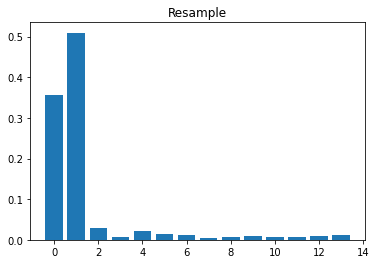

In [325]:
model = RandomForestClassifier(criterion='gini')
model.fit(Xr_train, yr_train)
y_pred = model.predict(Xr_test)
importance = model.feature_importances_
# summarize feat
accuracy = accuracy_score(yr_test, y_pred)
print(accuracy)
print(classification_report(yr_test,y_pred))
print(confusion_matrix(yr_test, y_pred))
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Resample")
plt.show()